In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import algo
import utils
import interactions
import dicke

In [2]:
def ising_mag(J0s, wz, alpha, gs, beta, N, M):
    return np.abs(np.array([algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)[0] for J0 in J0s]))

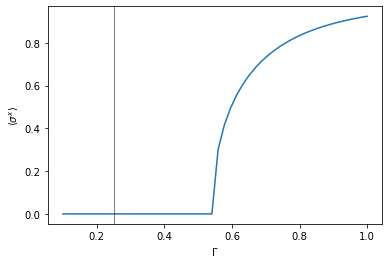

In [3]:
N = 70
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 1.0, 50)
alpha = 1.5

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_pbc(N, alpha)
J = interactions.shift(J, 0.0)

mags = []
for J0 in J0s:
    J = J0 * interactions.rescale(J)
    ws, lams = utils.dicke_from_ising(J, 1e-6)
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags.append(dicke.mag_longitudinal_hessian_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)[0])
mags = np.abs(np.array(mags))

plt.plot(J0s, mags)
plt.axvline(0.25, c='k', lw=0.5)
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')
plt.show()

Rounds to go: 2, current critical point:  0.6241379310344827 ...
Rounds to go: 1, current critical point:  0.659080459770115 ...


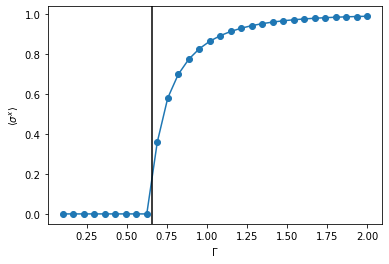

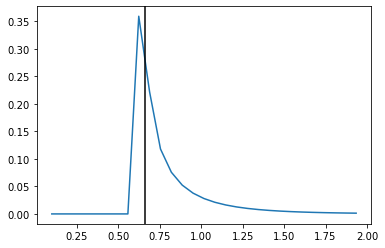

In [4]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 70
M = int(np.sqrt(N) * np.log(N))
beta = 1 / 1.25
wz = 1
J0s = np.linspace(0.1, 2, 30)
alpha = 0.5

gs = 0.0 * np.ones(N)

plt.plot(J0s, ising_mag(J0s, wz, alpha, gs, beta, N, M), marker='o')
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')

critical_J0 = utils.critical_point_recursive_refinement(ising_mag, J0s, [wz, alpha, gs, beta, N, M], rounds=3, verbose=True)
plt.axvline(critical_J0, c='k')

plt.show()

op = ising_mag(J0s, wz, alpha, gs, beta, N, M)
rel_diff = (op[1:] - op[:-1])

plt.plot(J0s[:-1], rel_diff)
plt.axvline(critical_J0, c='k')
plt.show()

$\ji =$  0.003612326836152177
[3.61232684e-03 1.35992025e+01]


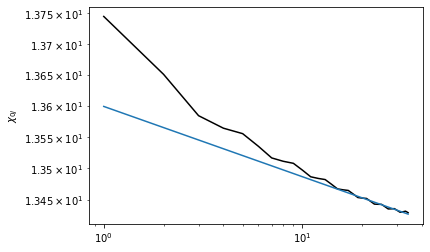

In [56]:
def correlation_length_fit(r, l, A):
    return A * r**(-l) 

N = 70
M = int(np.sqrt(N) * np.log(N))
beta = 1 / 0.02
wz = 1
J0 = 0.25
alpha = 0.9

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0
   
gs = 0.0 * np.ones(N)
mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
gs[i] = dg
mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
susc = ((mxs1 - mxs0) / dg)

rs = np.arange(1, N//2, 1)
fit_start = N//4
fit_rs = np.arange(fit_start, 4*N//8, 1)
plt.plot(rs, susc[1:N//2], c='k')
popt, pcov = curve_fit(correlation_length_fit, fit_rs, susc[fit_start:4*N//8], p0=[1, 1])
print(r'$\ji =$ ', popt[0])
print(popt)
plt.plot(rs, correlation_length_fit(rs, *popt))

#ax.axvline(0.25, c='k', lw=0.5)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\chi_{0j}$')
plt.show()

0.04698190583127333 -0.0010834898579135722


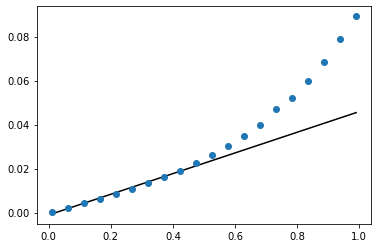

In [59]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 100
M = int(np.sqrt(N) * np.log(N))
wz = 1
beta = 1 / 0.4
J0 = 0.3

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0

alphas = np.linspace(0.01, 0.99, 20)
crit_exp = []
for alpha in alphas:
    gs = 0.0 * np.ones(N)
    mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    gs[i] = dg
    mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    susc = ((mxs1 - mxs0) / dg)

    fit_start = N//8
    #rs = np.arange(1, N//2, 1)
    #ax.plot(rs, susc[1:N//2], c='k')
    popt, pcov = curve_fit(correlation_length_fit, np.arange(fit_start,4*N//8, 1), susc[fit_start:4*N//8], p0=[1, 1])
    crit_exp.append(popt[0])
    
    
def correlation_decay_fit(x, m, n):
    return x*m + n

popt, pcov = curve_fit(correlation_decay_fit, alphas[:2*len(alphas)//4], crit_exp[:2*len(alphas)//4], p0=(1, 0))
print(*popt)
plt.plot(alphas, correlation_decay_fit(alphas, *popt), c='k')
plt.plot(alphas, crit_exp, lw=0, marker='o')

In [60]:
0.670866014377453
0.6635922496836434
0.6648414045219964
0.66985033482133


0.66985033482133

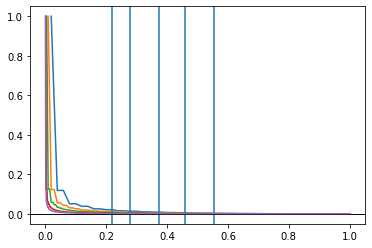

In [42]:
Ns = [50, 100, 200, 500, 1000]
alpha = 0.2

from scipy.linalg import eigh

for N in Ns:
    Jbase = interactions.powerlaw_pbc(N, alpha)
    Jbase = interactions.shift(Jbase, 0.)
    Jbase = interactions.rescale(Jbase)

    vals = eigh(Jbase, eigvals_only=True)
    plt.plot(np.arange(1, len(vals) + 1) / N, vals[::-1]) 
    plt.axvline(np.sqrt(N) * np.log(N) / N)
    plt.axhline(0, lw=0.5, c='k')
    
plt.show()